In [1]:
from datetime import date
from enum import Enum

import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
import pandas as pd
from scipy import stats

import network
from preprocess_data import Game, Venue, PowerPlay, Situation, calculate_time, read_networks, directed_to_undirected

In [2]:
def regular_networks():
    for nw in read_networks(Situation.REGULAR):
        yield nw

In [3]:
def power_play_networks():
    for nw in read_networks(Situation.POWER_PLAY):
        yield nw

In [4]:
def penalty_kill_networks():
    for nw in read_networks(Situation.PENALTY_KILL):
        if len(nw.nodes) > 0:
            yield nw

In [5]:
positions = ["Left Defense", "Right Defense", "Left Wing", "Center", "Right Wing"]

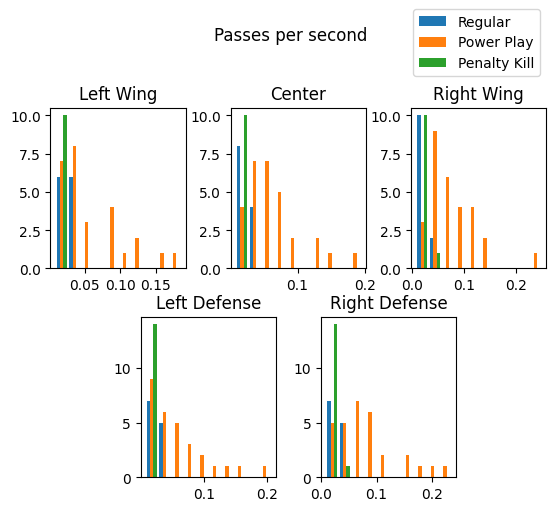

In [6]:
# Regular Networks: Degree distribution
fig = plt.figure()

for position, ax in zip(positions, [(1, 1), (1, 3), (0, 0), (0, 2), (0, 4)]):
    ax = plt.subplot2grid((2, 6), ax, colspan=2)
    x_reg = np.array([nw.degree(position, network.Weight.N_PASSES.value) / nw.time for nw in regular_networks()])
    x_pp  = [nw.degree(position, network.Weight.N_PASSES.value) / nw.time for nw in power_play_networks()]
    x_pp = np.array([d for d in x_pp if isinstance(d, float)])
    x_pk  = [nw.degree(position, network.Weight.N_PASSES.value) / nw.time for nw in penalty_kill_networks()]
    x_pk = np.array([d for d in x_pk if isinstance(d, float)])
    x = [x_reg, x_pp, x_pk]
    n, bins, patches = ax.hist(x, histtype='bar')
    ax.set_title(position)
    # ax.set_ylabel(position)
    
fig.legend(["Regular", "Power Play", "Penalty Kill"], bbox_to_anchor=(0.9, 1.1))
plt.suptitle("Passes per second", y=1.05)
plt.subplots_adjust(wspace=1, hspace=0.3)
plt.savefig("report/images/hockey/Degree_Distribution.png", dpi=600)
plt.show()

In [7]:
def passes_per_second(nw):
    return sum(w for (_, _, w) in nw.edges.data(network.Weight.N_PASSES.value)) / nw.time

def shots_per_second(nw):
    return nw.n_shots / nw.time

In [8]:
print(f"{'Sit.':>8} Cnt Passes Shots")
for (desc, nws) in [("Regular", regular_networks), ("PP", power_play_networks), ("PK", penalty_kill_networks)]:
    print(f"{desc:>8} \
{len(list(nws())):>3} \
{np.mean([passes_per_second(nw) for nw in nws()]):>.3f} \
{np.mean([shots_per_second(nw) for nw in nws()]):>.3f}")

    Sit. Cnt Passes Shots


KeyError: 'n_shots'

In [ ]:
# Regular Networks: Shot distribution
fig, axs = plt.subplots(1, 1)

x_reg = np.array([shots_per_second(nw) for nw in regular_networks()])
x_pp  = np.array([shots_per_second(nw) for nw in power_play_networks()])
x_pk  = np.array([shots_per_second(nw) for nw in penalty_kill_networks()])
x = [x_reg, x_pp, x_pk]
n, bins, patches = axs.hist(x, histtype='bar')
axs.set_xlabel("Shots per second")
axs.legend(["Regular", "Power Play", "Penalty Kill"])

plt.savefig("report/images/hockey/Shots_per_second.png", dpi=600)
plt.show()

In [ ]:
nw = next(regular_networks())